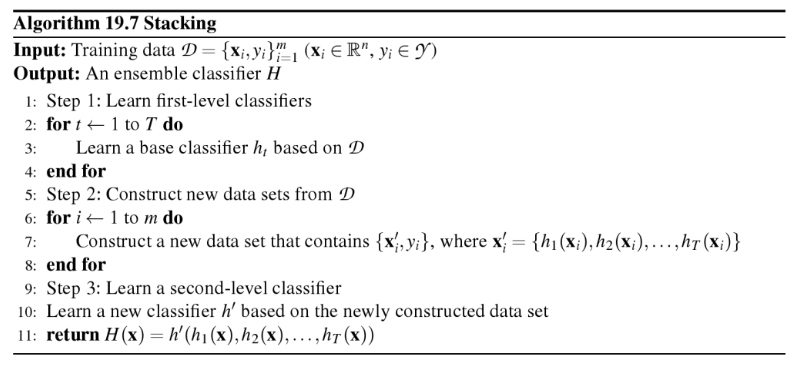

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
df = pd.read_excel(r"E:\PythonCore\datafiles\Social_Network_Ads.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        284 non-null    int64
 1   Salary     284 non-null    int64
 2   Purchased  284 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
X = df.iloc[:,[0,1]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(284, 2) (284,)


In [23]:
s = StandardScaler()
X_sc = s.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [26]:
models = [('DT' , DecisionTreeClassifier(criterion='gini')),
                ('KNN', KNeighborsClassifier(n_neighbors=15)),
                 ('GN', GaussianNB())]

In [27]:
stacked_model = StackingClassifier(models)
stacked_model.fit(X_train, y_train)
stacked_model.score(X_test, y_test)

0.9473684210526315

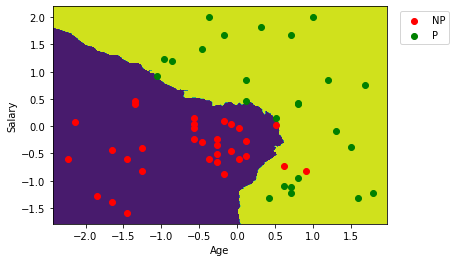

In [28]:
# Creation of the mesh
age = np.arange(X_test[:,0].min()-0.2, X_test[:,0].max()+0.2,0.01)
sal = np.arange(X_test[:,1].min()-0.2, X_test[:,1].max()+0.2,0.01)
Age, Sal = np.meshgrid(age,sal)
# Convert2D to 1D and concatenate the 2 arrays
formed_data = np.c_[Age.ravel(), Sal.ravel()]
formed_data.shape
ans = stacked_model.predict(formed_data)
ans = ans.reshape(Age.shape)
mask_for_NP = y_test == 0
mask_for_P = y_test == 1
plt.contourf(Age, Sal, ans)
plt.scatter(X_test[mask_for_NP,0],X_test[mask_for_NP,1], c='r', label="NP")
plt.scatter(X_test[mask_for_P,0],X_test[mask_for_P,1], c='g', label="P")
# purchased and not purchased points to be colored separately
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()